# Problem Set 3: Multiple Linear Regression Part 1
### Jake Lee

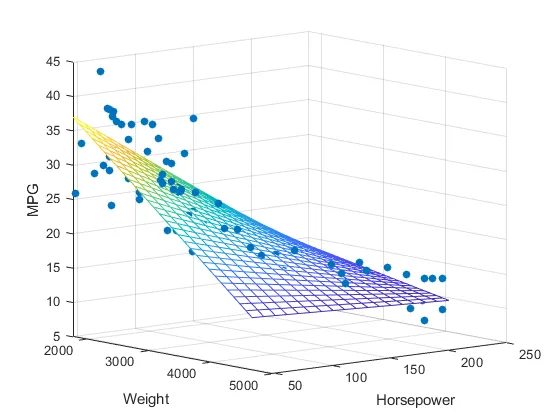
---
 ### Import Libraries

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

# Question 1
Use the data in HPRICE1.DTA where `price` is the house price measured in thousands of dollars.

In [2]:
q1_data = 'HPRICE1.DTA'
df = pd.read_stata(q1_data)
df.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


### (i) Estimate the regression model where `price` is the explained variable, and `sqrft` & `bdrms` are the explanatory variables.

In [3]:
# assign explanatory variables (independent variables)
X = df[['sqrft', 'bdrms']]

# assign outcome variable (dependent variables)
Y = df['price']

# add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# fit the OLS regression model
model = sm.OLS(Y, X).fit()

# regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.57e-19
Time:                        12:22:22   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3150     31.047     -0.622      0.536     -81.044      42.414
sqrft          0.1284      0.014      9.291      0.000       0.101       0.156
bdrms         15.1982      9.484      1.603      0.113      -3.658      34.054
==============================================================================
Omnibus:                       25.221   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.973
Skew:                           1.122   Prob(JB):                     1.72e-10
Kurtosis:                       5.689   Cond. No.                     9.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (ii) What is the estimated increase in price for a house with one more bedroom, holding square footage constant?

$15,200 for an extra bedroom, holding sq feet constant

### (iii) What is the estimated increase in price for a house with an additional bedroom that is 140 square feet in size? Compare this to your answer in part (ii).

In [4]:
140*(0.1248) + 15.1982 

32.670199999999994

$32,670 for an extra bedroom, and an extra 140 sq feet

### (iv) What percentage of the variation in price is explained by square footage and number of bedrooms?

$R^2 \approx 63\%$ implies that about 63 percent of the variation is explained by the independent variables `sqrft` and `bdrms`.

### (v) The first house in the sample has `sqrft` = 2,438 and `bdrms` = 4. Find the predicted selling price for this house based on the regression estimates.

We can use the following equation using the results from our regression:

$price = \beta_0 + \beta_1 (sqrft) + \beta_2(bdrms)$

In [5]:
-19.32 + 0.1284*(2438) + 15.1982*(4)

354.512

\$354,512 for a 4 bedroom, 2,438 square foot house.

### (vi) The actual selling price of the first house in the sample was \$300,000 (so `price` = 300). Find the residual for this house. Does it suggest that the buyer underpaid or overpaid for the house?

$residual = observed\ value - predicted\ value$ = $300000 - 354512 \approx -54000$ , implying that the buyer underpaid.

# Question 2
The file CEOSAL2.DTA contains data on 177 chief executive officers and can be used to examine
the effects of firm performance (`sales`, `mktval`) on CEO salary (`salary`).


In [6]:
q2data = 'CEOSAL2.DTA'
df = pd.read_stata(q2data)
df.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208


### (i) Estimate a model relating annual salary to firm sales and market value. Make the model of the constant elasticity variety for both independent variables. Write the results out in equation form.

The term "constant elasticity" refers to a situation in which the relationship between the dependent variable and one or more independent variables is such that a percentage change in the independent variable is associated with a constant percentage change in the dependent variable. We use the log transformation becaus it converts the exponential growth pattern to a linear growth pattern, and it simultaneously converts the multiplicative (proportional-variance) seasonal pattern to an additive (constant-variance) seasonal pattern. See here for more info regarding logarithms: https://people.duke.edu/~rnau/411log.htm

In [7]:
X = df[['lsales','lmktval']]
Y = df['lsalary']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.73e-14
Time:                        12:22:22   Log-Likelihood:                -130.56
No. Observations:                 177   AIC:                             267.1
Df Residuals:                     174   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6209      0.254     18.163      0.000       4.119       5.123
lsales         0.1621      0.040      4.087      0.000       0.084       0.240
lmktval        0.1067      0.050      2.129      0.035       0.008       0.206
==============================================================================
Omnibus:                       17.241   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.383
Skew:                          -0.038   Prob(JB):                     1.72e-14
Kurtosis:                       5.931   Cond. No.                         70.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$salary = \beta_0 + \beta_1 (sales) + \beta_2(mktval) + \epsilon$

### (ii) Add `profits` to the model from part (i). Why can this variable not be included in logarithmic form? Would you say that these firm performance variables explain most of the variation in CEO salaries?

In [8]:
X = df[['lsales','lmktval','profits']]
Y = df['lsalary']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     24.64
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.53e-13
Time:                        12:22:22   Log-Likelihood:                -130.53
No. Observations:                 177   AIC:                             269.1
Df Residuals:                     173   BIC:                             281.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6869      0.380     12.343      0.000       3.937       5.436
lsales         0.1614      0.040      4.043      0.000       0.083       0.240
lmktval        0.0975      0.064      1.531      0.128      -0.028       0.223
profits     3.566e-05      0.000      0.235      0.815      -0.000       0.000
==============================================================================
Omnibus:                       17.054   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.074
Skew:                          -0.029   Prob(JB):                     3.32e-14
Kurtosis:                       5.901   Cond. No.                     4.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since `profits` variable has negative entries, a natural log cannot be computed.
\
The $R^2 = 0.299$ implying that only about 30 percent of the variation of `salaries` is explained.

### (iii) Add the variable `ceoten` to the model in part (ii). What is the estimated percentage return for another year of CEO tenure, holding other factors fixed?

In [9]:
X = df[['lsales','lmktval','profits', 'ceoten']]
Y = df['lsalary']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lsalary   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     20.08
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.39e-13
Time:                        12:22:22   Log-Likelihood:                -128.10
No. Observations:                 177   AIC:                             266.2
Df Residuals:                     172   BIC:                             282.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5578      0.380     11.986      0.000       3.807       5.308
lsales         0.1622      0.039      4.109      0.000       0.084       0.240
lmktval        0.1018      0.063      1.614      0.108      -0.023       0.226
profits     2.905e-05      0.000      0.193      0.847      -0.000       0.000
ceoten         0.0117      0.005      2.187      0.030       0.001       0.022
==============================================================================
Omnibus:                       25.236   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.011
Skew:                          -0.281   Prob(JB):                     5.28e-27
Kurtosis:                       7.012   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An extra year of tenure yields a 1.17 percent increase in CEO salary, all else fixed.

### (iv) Find the sample correlation coefficient between the variables log(mktval) and profits. Are these variables highly correlated? What does this say about the OLS estimators?

In [10]:
corr_df = df[['lmktval','profits']]
corr_df.corr()

,lmktval,profits
lmktval,1.000000,0.776898
profits,0.776898,1.000000


There is a high correlation of 0.78 between `lmktval` and `profits`. Unless there existed perfect collinearity, there is no effect on the OLS estimates from above. 

 - While collinearity doesn't directly bias the OLS estimates of the coefficients, it can make the standard errors of those estimates larger, which affects the precision and interpretability of the results. Researchers often pay attention to the standard errors when assessing the impact of collinearity because they influence hypothesis tests, confidence intervals, and the ability to make statistically significant inferences about the relationships between variables.

# Question 3
Use the data in ATTEND.DTA for this exercise.

In [11]:
q3data = 'ATTEND.DTA'
df = pd.read_stata(q3data)
df.head()

,attend,termGPA,priGPA,ACT,final,atndrte,hwrte,frosh,soph,missed,stndfnl
0,27,3.19,2.64,23,28,84.375,100.0,0,1,5,0.472689
1,22,2.73,3.52,25,26,68.750,87.5,0,0,10,0.052521
2,30,3.00,2.46,24,30,93.750,87.5,0,0,2,0.892857
3,31,2.04,2.61,20,27,96.875,100.0,0,1,1,0.262605
4,32,3.68,3.32,23,34,100.000,100.0,0,1,0,1.733193


### (i) Obtain the minimum, maximum, and average values for the variables `atndrte`, `priGPA`, and `ACT`.

In [12]:
min_max_avg = df[['atndrte', 'priGPA', 'ACT']]
min_max_avg.describe()

,atndrte,priGPA,ACT
count,680.000000,680.000000,680.000000
mean,81.709557,2.586775,22.510294
std,17.046988,0.544714,3.490768
min,6.250000,0.857000,13.000000
25%,75.000000,2.190000,20.000000
50%,87.500000,2.560000,22.000000
75%,93.750000,2.942500,25.000000
max,100.000000,3.930000,32.000000


### (ii) Estimate the regression model where `atndrte` is the explained variable and `priGPA` & `ACT` are explanatory variables. Interpret the intercept. Does it have a useful meaning?

In [13]:
X = df[['priGPA', 'ACT']]
Y = df['atndrte']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                atndrte   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     138.7
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.39e-51
Time:                        12:22:22   Log-Likelihood:                -2776.1
No. Observations:                 680   AIC:                             5558.
Df Residuals:                     677   BIC:                             5572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.7004      3.884     19.490      0.000      68.074      83.327
priGPA        17.2606      1.083     15.936      0.000      15.134      19.387
ACT           -1.7166      0.169    -10.156      0.000      -2.048      -1.385
==============================================================================
Omnibus:                      126.367   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.444
Skew:                          -1.079   Prob(JB):                     2.75e-52
Kurtosis:                       4.929   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept implies that when other variables are held constant, the attendance rate is 75.7 percent. In the scope of the regression, it does not inform us of any significant information.

### (iii) Discuss the estimated slope coefficients. Are there any surprises?

The slope coefficient for `priGPA` = 17.26
 -  Holding other variables fixed, the increase in cumulative GPA prior to term by 1 (`priGPA`)
    increases the attendance rate (`atndrte`) by 17.26 percent points.
    
The slope coefficient for `ACT` = -1.72
 - Holding other variables fixed, the increase in ACT score (`ACT`) by 1 decreases
    attendance rate (`atndrte`) by 1.72 percent points.
 - This is surprising because an increase in ACT score would seem to imply that a student regularly attends class. The data does not support this, and instead showcases that per point increase in ACT score, the attendance rate actually decreases. 



### (iv) What is the predicted atndrte if `priGPA` = 3.65 and `ACT` = 20? What do you make of this result? Are there any students in the sample with these values of the explanatory variables?

In [14]:
# using regression formula from above:
attendance_rate = 75.7 + 17.26*(3.65) - 1.7166*(20)
print("attendance_rate: {:.2f}".format(attendance_rate))

attendance_rate: 104.37


This is implausible because an attentance rate cannot exceed 100 percent.

In [15]:
df[(df['priGPA'] == 3.65) & (df['ACT'] == 20)] 

,attend,termGPA,priGPA,ACT,final,atndrte,hwrte,frosh,soph,missed,stndfnl
568,28,3.5,3.65,20,29,87.5,50.0,1,0,4,0.682773


There is one student and his attendance rate is 87.5 percent, differing from our regression by about 15 percent.

### (v) If Student A has priGPA = 3.1 and ACT = 21 and Student B has priGPA = 2.1 and ACT = 26, what is the predicted difference in their attendance rates?

In [16]:
diff = (75.7 + 17.26*(3.1) - 1.7166*(21)) - (75.7 + 17.26*(2.1) - 1.7166*(26))
print("attendance rate difference: {:.2f}%".format(diff))

attendance rate difference: 25.84%


# Question 4
Use the data in CHARITY.DTA to answer the following questions:

In [17]:
q4data = 'CHARITY.DTA'
df = pd.read_stata(q4data)
df.head()

,respond,gift,resplast,weekslast,propresp,mailsyear,giftlast,avggift
0,0,0,0,143.000000,0.3,2.5,10,10.0
1,0,0,0,65.428574,0.3,2.5,10,10.0
2,0,0,1,13.142858,0.3,2.5,10,10.0
3,0,0,0,120.142860,0.3,2.5,10,10.0
4,1,10,0,103.857140,0.2,2.5,10,10.0


### (i) Estimate the regression where `gift` is the explained variable and `mailsyear`, `giftlast`, `propresp` are the explanatory variables. Report the OLS estimates, including the sample size and R-squared. How does the R-squared compare with that from the simple regression that omits `giftlast` and `propresp`?

#### MLR:

In [18]:
X = df[['mailsyear', 'giftlast', 'propresp']] # explanatory
Y = df['gift'] # explained

X = sm.add_constant(X) # constant

model = sm.OLS(Y, X).fit() # fit model

model.summary() # results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gift   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     129.3
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           3.86e-80
Time:                        12:30:02   Log-Likelihood:                -17446.
No. Observations:                4268   AIC:                         3.490e+04
Df Residuals:                    4264   BIC:                         3.492e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5515      0.803     -5.668      0.000      -6.126      -2.977
mailsyear      2.1663      0.332      6.526      0.000       1.516       2.817
giftlast       0.0059      0.001      4.138      0.000       0.003       0.009
propresp      15.3586      0.875     17.562      0.000      13.644      17.073
==============================================================================
Omnibus:                     5103.126   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           941920.719
Skew:                           6.166   Prob(JB):                         0.00
Kurtosis:                      74.726   Cond. No.                         721.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### SLR:

In [19]:
X = df['mailsyear'] # explanatory
Y = df['gift'] # explained

X = sm.add_constant(X) # constant

model = sm.OLS(Y, X).fit() # fit model

model.summary() # results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gift   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     59.65
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.40e-14
Time:                        12:32:32   Log-Likelihood:                -17602.
No. Observations:                4268   AIC:                         3.521e+04
Df Residuals:                    4266   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0141      0.739      2.724      0.006       0.564       3.464
mailsyear      2.6495      0.343      7.723      0.000       1.977       3.322
==============================================================================
Omnibus:                     4951.411   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           784986.187
Skew:                           5.889   Prob(JB):                         0.00
Kurtosis:                      68.387   Cond. No.                         8.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MLR $R^2 = 0.083 = 8.3\%$

SLR $R^2 = 0.014 = 1.4\%$

This implies that the variance in the dependent variable explained by the independent variables is better explained in the MLR model.

Overall, the variance in `gift` left mostly unexplained by `mailsyear`, `giftlast`, and `propresp`

### (ii) Interpret the coefficient on `mailsyear`. Is it bigger or smaller than the corresponding simple regression coefficient?

Smaller

### (iii) Interpret the coefficient on `propresp`. Be careful to notice the units of measurement of `propresp`.

Holding other factors equal, $\beta_3 = 15.3586$, implying for each percentage increase in  response rate (`propresp`), `gift` increases 15%

### (iv) Now add the variable `avggift` to the equation. What happens to the estimated effect of `mailsyear`?

In [20]:
X = df[['mailsyear', 'giftlast', 'propresp','avggift']] # explanatory
Y = df['gift'] # explained

X = sm.add_constant(X) # constant

model = sm.OLS(Y, X).fit() # fit model

model.summary() # results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gift   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     267.3
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          2.82e-205
Time:                        12:49:26   Log-Likelihood:                -17154.
No. Observations:                4268   AIC:                         3.432e+04
Df Residuals:                    4263   BIC:                         3.435e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3278      0.758     -9.664      0.000      -8.814      -5.841
mailsyear      1.2012      0.312      3.845      0.000       0.589       1.814
giftlast      -0.2609      0.011    -24.251      0.000      -0.282      -0.240
propresp      16.2046      0.818     19.821      0.000      14.602      17.807
avggift        0.5269      0.021     24.996      0.000       0.486       0.568
==============================================================================
Omnibus:                     3922.109   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           698065.217
Skew:                           3.806   Prob(JB):                         0.00
Kurtosis:                      65.189   Cond. No.                         814.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`mailsyear` decreases from 2.2 to 1.2, with the additional independent variable `avggift`.

This reduces the effect of `mailsyear` on `gift`

### (v) In the equation from part (iv), what has happened to the coefficient on `giftlast`? What do you think is happening?

`giftlast` decreases from 0.0059 to -0.2609.

This could imply that there is some relationship between `giftlast` and `avggift`, such that `giftlast` showcases its true effect when `avggift` is included in the model.